In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("stocks.csv")

Saving stocks.csv to stocks.csv


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (248, 8)
  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL 2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL 2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [ ]:
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None
                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:0

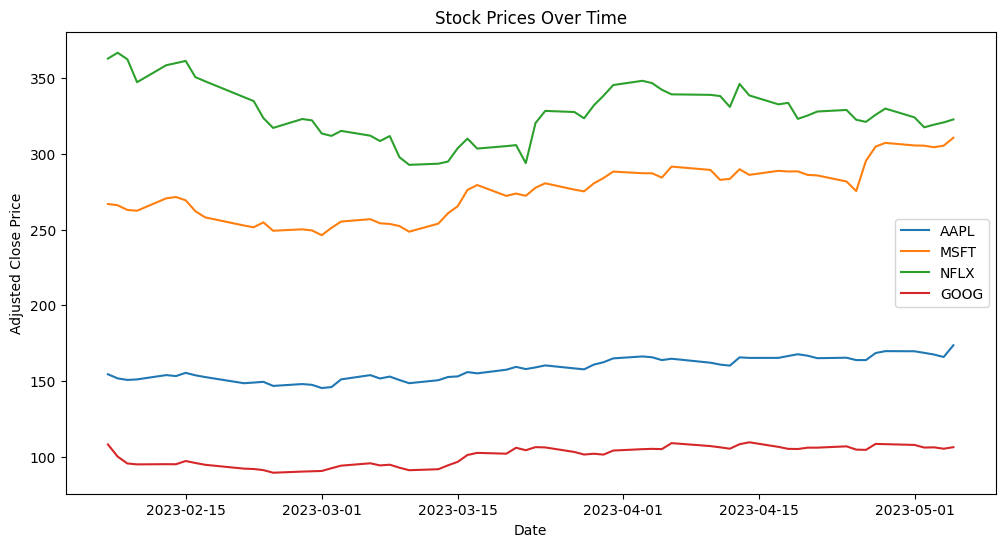

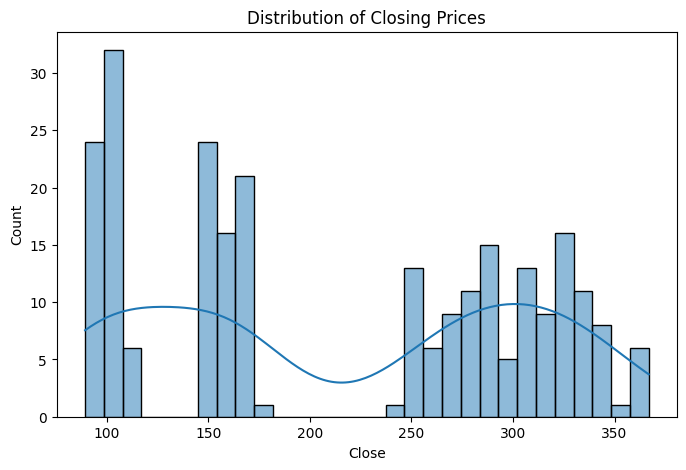

In [ ]:
plt.figure(figsize=(12,6))
for ticker in df['Ticker'].unique():
    subset = df[df['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Adj Close'], label=ticker)
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

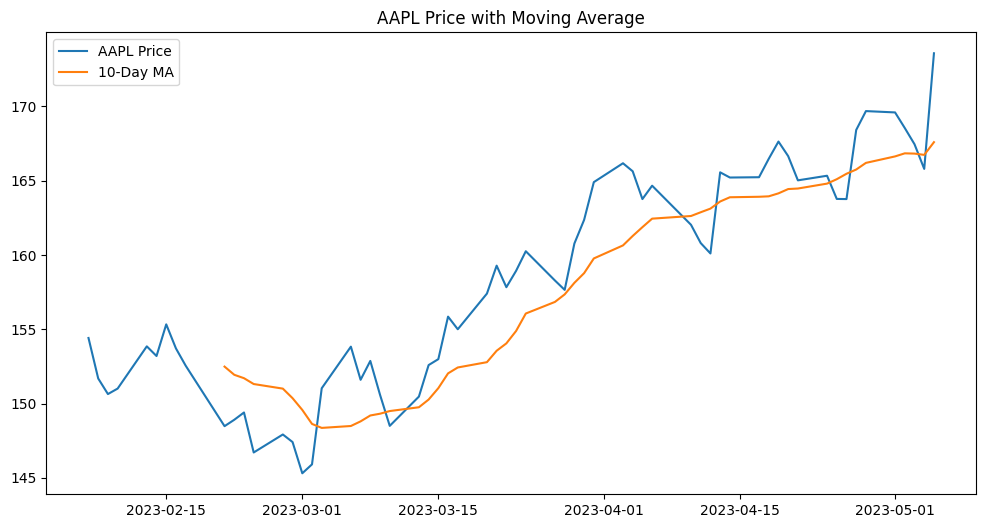

In [ ]:
df = df.sort_values(by=['Ticker','Date'])
df['MA_10'] = df.groupby("Ticker")['Adj Close'].transform(lambda x: x.rolling(10).mean())
df['Volatility_10'] = df.groupby("Ticker")['Adj Close'].transform(lambda x: x.rolling(10).std())

plt.figure(figsize=(12,6))
subset = df[df['Ticker']=="AAPL"]
plt.plot(subset['Date'], subset['Adj Close'], label="AAPL Price")
plt.plot(subset['Date'], subset['MA_10'], label="10-Day MA")
plt.title("AAPL Price with Moving Average")
plt.legend()
plt.show()


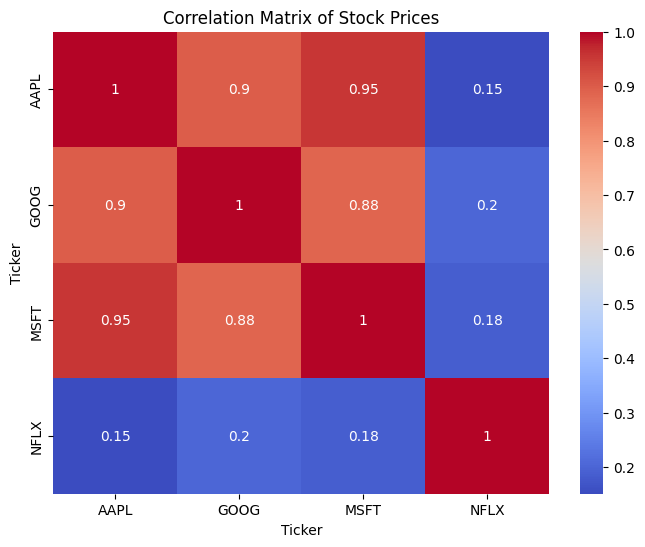

In [ ]:
pivot_df = df.pivot(index="Date", columns="Ticker", values="Adj Close")
corr_matrix = pivot_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Prices")
plt.show()


In [ ]:
from IPython.display import display, Markdown

summary_text = """
# Summary & Conclusion

**Project:** Stock Market Data Analysis using Machine Learning
**Internship:** Unified Mentor Internship Program
**Submitted by:** Mugunthan M ; Bsc AI & ML

## Key Points:
- The dataset contains **248 rows** and **8 columns**, representing historical stock market price data.
- Exploratory Data Analysis revealed trends in **closing prices**, **price volatility**, and **trading volume patterns**.
- Data preprocessing ensured correct handling of date formats and numerical features.
- Machine learning techniques were explored to analyze historical price movements.
- Regression-based models can be used to predict **future closing prices** based on past data.
- Visualizations show clear market trends along with short-term price fluctuations.
- **Next Steps / Future Work:**
    - Train advanced models such as **Random Forest, XGBoost, or Gradient Boosting** for better prediction accuracy.
    - Incorporate technical indicators like **SMA, EMA, RSI, and MACD** for improved feature engineering.
    - Apply **time-series forecasting models** such as **ARIMA or LSTM/GRU** for long-term stock prediction.

**Conclusion:**
The analysis demonstrates a systematic approach to cleaning, exploring, and analyzing stock market data. It provides valuable insights into price behavior and serves as a foundation for predictive modeling in financial analysis.
"""

display(Markdown(summary_text))



# Summary & Conclusion

**Project:** Stock Market Data Analysis using Machine Learning  
**Internship:** Unified Mentor Internship Program  
**Submitted by:** Mugunthan M ; Bsc AI & ML  

## Key Points:
- The dataset contains **248 rows** and **8 columns**, representing historical stock market price data.
- Exploratory Data Analysis revealed trends in **closing prices**, **price volatility**, and **trading volume patterns**.
- Data preprocessing ensured correct handling of date formats and numerical features.
- Machine learning techniques were explored to analyze historical price movements.
- Regression-based models can be used to predict **future closing prices** based on past data.
- Visualizations show clear market trends along with short-term price fluctuations.
- **Next Steps / Future Work:**
    - Train advanced models such as **Random Forest, XGBoost, or Gradient Boosting** for better prediction accuracy.
    - Incorporate technical indicators like **SMA, EMA, RSI, and MACD** for improved feature engineering.
    - Apply **time-series forecasting models** such as **ARIMA or LSTM/GRU** for long-term stock prediction.

**Conclusion:**
The analysis demonstrates a systematic approach to cleaning, exploring, and analyzing stock market data. It provides valuable insights into price behavior and serves as a foundation for predictive modeling in financial analysis.
